# 电信客户流失预测学习目标
- 掌握如何使用逻辑回归结果给你业务建议
---


In [16]:
# 导入Pandas包
import pandas as pd
# 导入数据可视化seaborn包
import seaborn as sns
# 导入matplotlib库pylot模块
import matplotlib.pyplot as plt
%matplotlib inline

# 加载数据
churn = pd.read_csv('../file/churn.csv')
churn.info()

# 数据总结：
# 1、7043条记录
# 2、15个字段，数据类型包含：浮点型2个字段、整形12个字段、对象类型2个字段
# 3、不存在空数据，占用内存880k

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [17]:
churn.head()

,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65


In [18]:
# 对gender性别进行处理，get_dunnies会给字段对应对每个类别创建一个新的列
churn = pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,True,False,True,False
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,True,False,False,True
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,False,True,False,True
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,True,False,False,True
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,False,True,True,False


In [19]:
# 删除不需要保留的数据
churn.drop(['Churn_No', 'gender_Male'], axis=1, inplace=False)
churn.columns = churn.columns.str.lower()
churn.head()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_no,churn_yes,gender_female,gender_male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,True,False,True,False
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,True,False,False,True
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,False,True,False,True
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,True,False,False,True
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,False,True,True,False


In [20]:
# 对转换后的字段进行重命名
new_columns = {'churn_yes': 'flag'}
churn = churn.rename(columns=new_columns)
# 二分模型、分析flag中1和0的占比
churn.flag.value_counts()

flag
False    5174
True     1869
Name: count, dtype: int64

In [21]:
churn.flag.value_counts(1)

flag
False    0.73463
True     0.26537
Name: proportion, dtype: float64

In [22]:
# 按照标签进行分组、着看不同标签分组的平均值
summary = churn.groupby('flag')
summary.mean()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_no,gender_female,gender_male
flag,,,,,,,,,,,,,,,,,
False,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,1.0,0.492656,0.507344
True,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.0,0.502408,0.497592


<Axes: xlabel='count', ylabel='contract_month'>

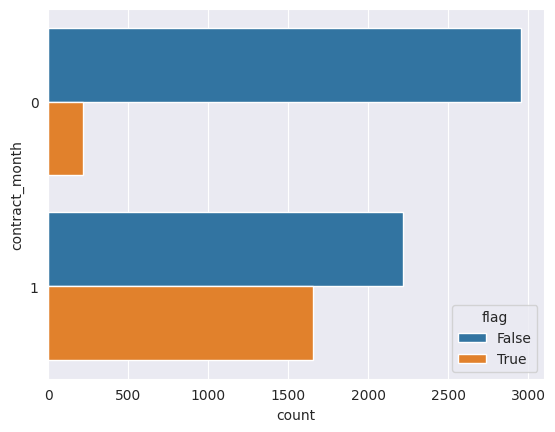

In [25]:
# 绘制按月付费或非按月服务男女用户流失的比率
sns.countplot(y='contract_month', hue='flag', data=churn)

<Axes: xlabel='count', ylabel='partner_att'>

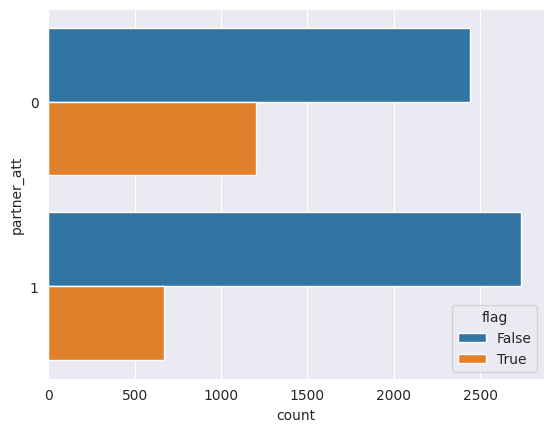

In [27]:
# 绘制配偶是否也是att用户下男女用户流失比例
sns.countplot(y='partner_att', hue='flag', data=churn)

In [36]:
# 选定目标值和特征值
y = churn['flag']
x = churn[['contract_month', 'internet_other', 'streamingtv']]

# 调用sklearn模块，随机抽训练集和测试集
from sklearn.model_selection import train_test_split

# 训练集测试集划分：
# - test_size:测试集比例
# - random—_state：随机产生的种子数，确保每次风格结果的可重复性
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# 调用sklearn逻辑回归模块
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
estimator.fit(x_train, y_train)


LogisticRegression()

In [37]:
# 模型评估
y_pred_train = estimator.predict(x_train)
y_pred_test = estimator.predict(x_test)

import sklearn.metrics as metrics
metrics.accuracy_score(y_train, y_pred_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)

0.7006333927971842

In [53]:
# 参数调整

# 导入k临近的交叉验证模型
from sklearn.model_selection import StratifiedKFold

# 导入k临近中网格搜索模块
from sklearn.model_selection import GridSearchCV


kfold = StratifiedKFold(n_splits=5, shuffle=True)
from sklearn import linear_model
lr = linear_model.LogisticRegression()

solver = ['newton-cg', 'lbfgs', 'liblinear']
c = [0.001, 0.01, 1, 10, 100]
param_grid = {'solver': solver, 'C': c, 'class_weight': ['balanced']}
search = GridSearchCV(lr, param_grid, cv=kfold)
lr = search.fit(x_train, y_train)

In [64]:
# 查看模型的回归系数
lr.best_estimator_.coef_

array([[0.43082716, 0.30878966, 0.04744517]])

In [61]:
# 最优参数组合
lr.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'solver': 'newton-cg'}

# 小结：
- 除了直接预测用户是否会流失外，还可以利用模型中回归系数得出对业务有帮助的建议
- 当样本分布不均衡是（例如 0样本数量是5174，1样本的数量是1869）可以通过添加参数class_weight='balanced'来增加样本占比较低类别权重